In [2]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 281 kB/s 


In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

####Reading DATA

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_df = pd.read_csv('/content/drive/MyDrive/Public/data science project/churn prediction/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Public/data science project/churn prediction/test.csv')
 
train_df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
train_df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


As we can see in this table, all data have different range. than we would need to normalize them or take care about variance scaling.

####what percentage of costumer churn?

In [9]:
train_df[train_df['churn']=='yes'].shape[0]/  train_df.shape[0]

0.14070588235294118

0.14 of churned data set show a imblanced data in two class.

####correlation

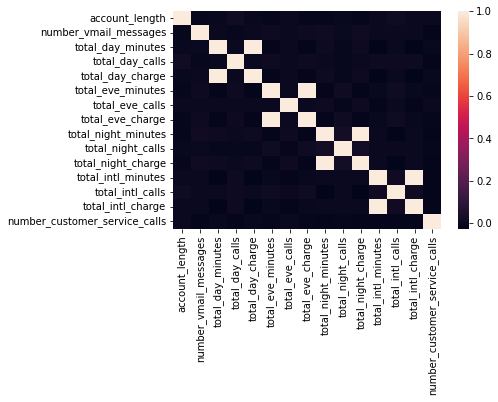

In [10]:
corr = train_df.corr()

sb.heatmap(corr)

In [11]:
#delete the correlate columns as they have same information

train_df.drop(['total_day_minutes', 'total_eve_minutes' , 'total_night_minutes' , 'total_intl_minutes'],axis = 1, inplace = True)

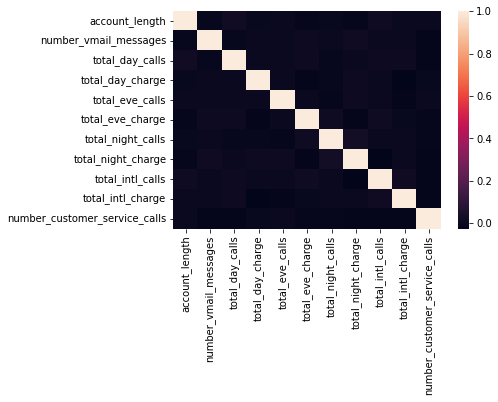

In [12]:
##heatmap after delete correlate columns
corr = train_df.corr()

sb.heatmap(corr)

In [13]:
train = train_df.copy()
test = test_df.copy()

In [14]:

# def categorical_to_num(list):
#   uni_list = list.unique()
#   dic = dict()
#   for i in range(len(uni_list)):
#     dic[uni_list[i]] = int(i)
#   return dic

# ##convert categorical to code
# for i in range(len(train_df['state'])):
#   train['state'][i]  = int(categorical_to_num(train_df['state'])[train_df['state'][i]])


# #I could do this by me def.but it needs to convert.and then i choose the easiest way!

In [15]:
##for converting boject to intiger

# train['state']= pd.Categorical(train['state']).codes
# train['area_code'] = pd.Categorical(train['area_code']).codes
# train['international_plan'] = pd.Categorical(train['international_plan']).codes
# train['voice_mail_plan'] = pd.Categorical(train['voice_mail_plan']).codes
# train['churn'] = pd.Categorical(train['churn']).codes
# test['state'] = pd.Categorical(test['state']).codes
# test['area_code'] = pd.Categorical(test['area_code']).codes
# test['international_plan'] = pd.Categorical(test['international_plan']).codes
# test['voice_mail_plan'] = pd.Categorical(test['voice_mail_plan']).codes

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_calls                4250 non-null   int64  
 7   total_day_charge               4250 non-null   float64
 8   total_eve_calls                4250 non-null   int64  
 9   total_eve_charge               4250 non-null   float64
 10  total_night_calls              4250 non-null   int64  
 11  total_night_charge             4250 non-null   float64
 12  total_intl_calls               4250 non-null   i

<BarContainer object of 46 artists>

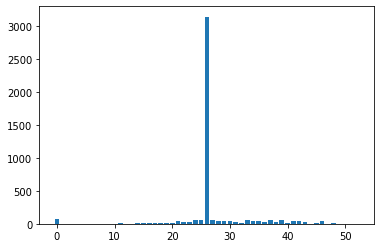

In [17]:
y =train['number_vmail_messages'].value_counts()
x = train['number_vmail_messages'].unique()

plt.bar(x , y)

#why lots of number are between 20 and 30?

categorical Variable

In [18]:
variable = [feature for feature in train_df.columns if train_df[feature].dtype == 'O']

variable

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [19]:
##I didn't learn this yet!!

def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y) , ha = 'right')

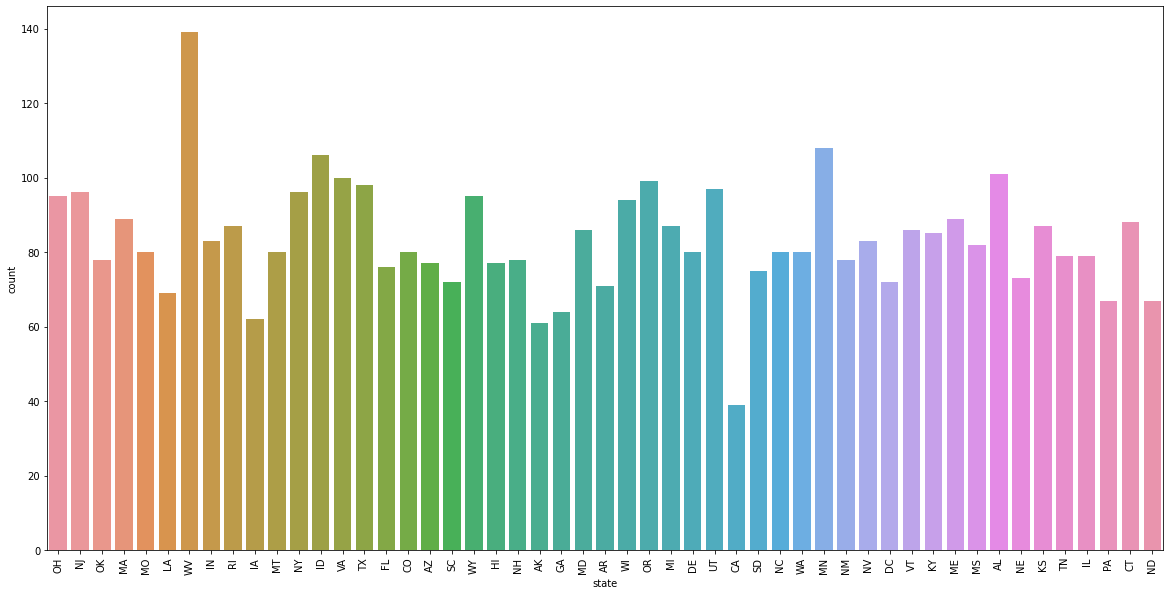

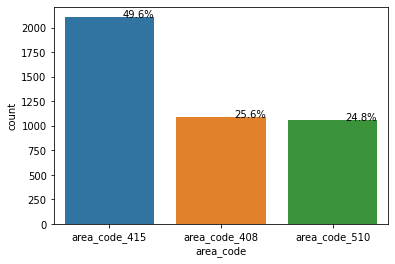

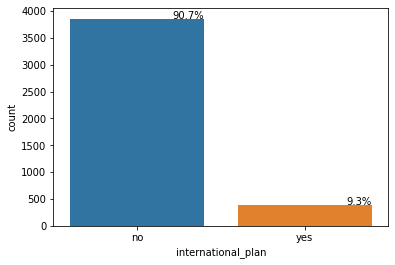

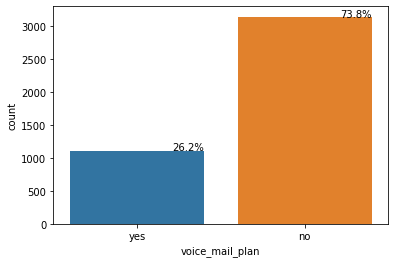

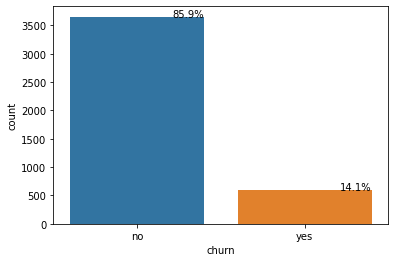

In [20]:
####Countplot fonction in seaborn!!

for feature in variable:
  if feature == 'state':
    plt.figure(figsize= (20,10))
    sns.countplot(train_df[feature])
    plt.xticks(size = 10, rotation = 'vertical')
    plt.show()
  else:
    ax = sns.countplot(train_df[feature])
    total = len(train)
    with_per(total , ax)
    plt.show()
  
  print('\n')

##numerical variable

###visualization distribution of numerical variable for churn and not-churn classes.

In [21]:
num_feature = [feature for feature in train_df.columns if train_df[feature].dtype != 'O']

print('list of Numerical features:{}'.format(num_feature))

list of Numerical features:['account_length', 'number_vmail_messages', 'total_day_calls', 'total_day_charge', 'total_eve_calls', 'total_eve_charge', 'total_night_calls', 'total_night_charge', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


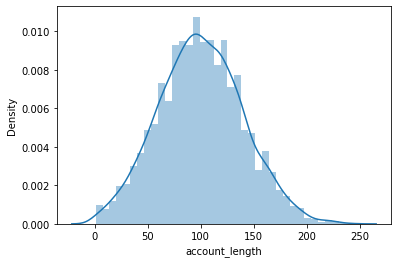

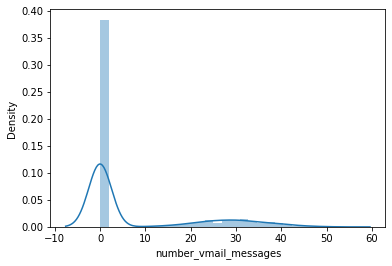

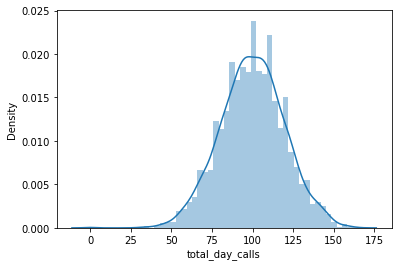

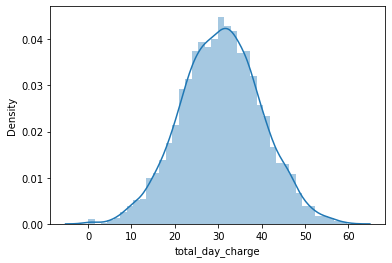

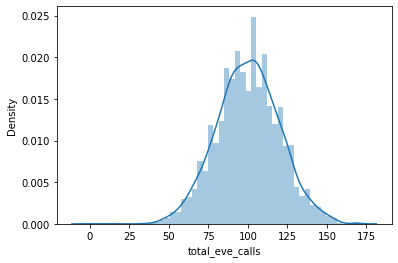

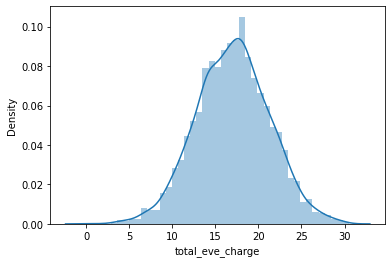

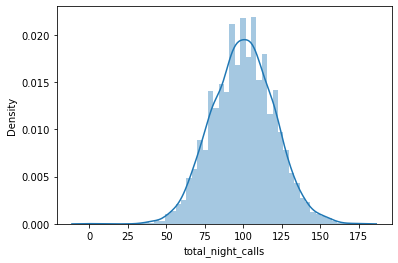

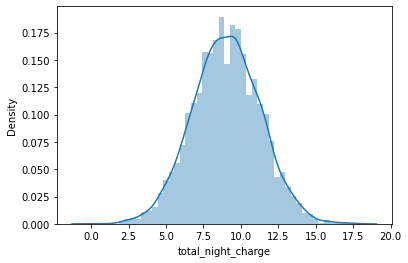

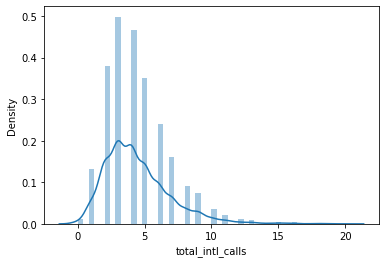

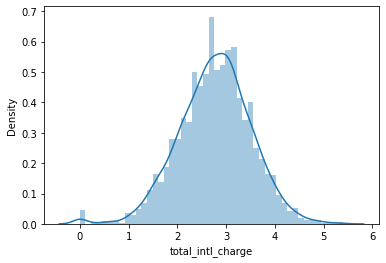

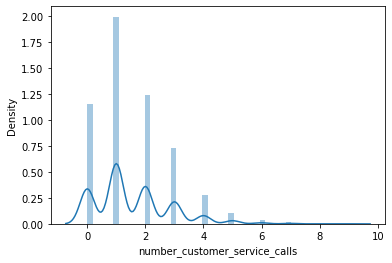

In [22]:
for feature in num_feature:
  sns.distplot(train_df[feature])
  plt.show()
  print('\n')


AS we can see in above destiny plot, All of features have normal destiny except 'number_customer_service_calls'!we should do sth for this feature later on feature engineering setp:) I should learn more about feature engineering!

##Bivariate Analysis

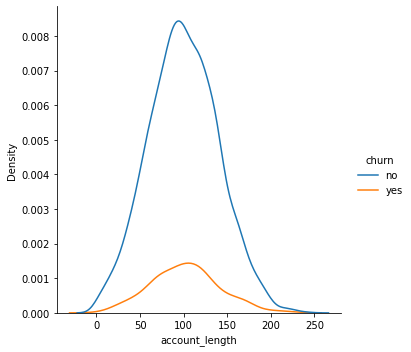

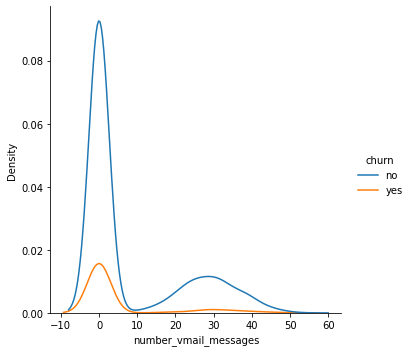

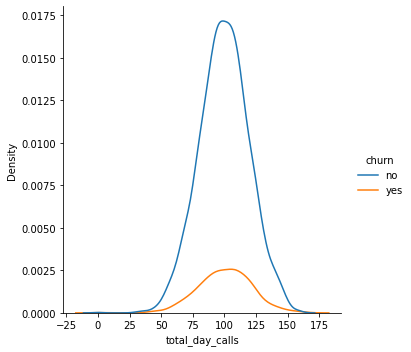

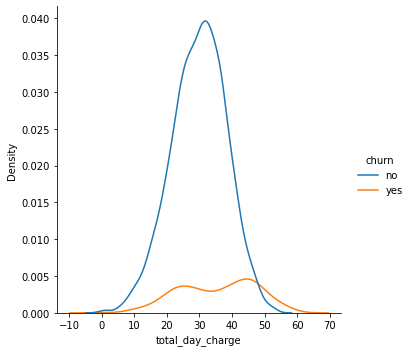

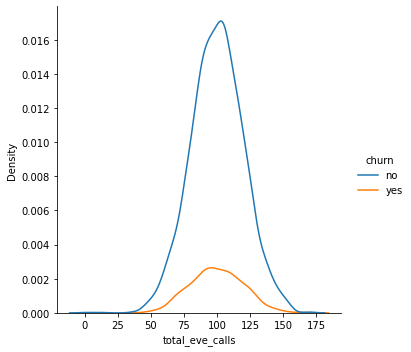

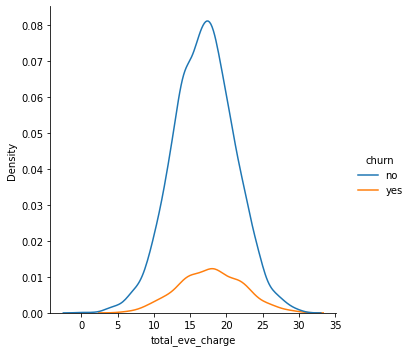

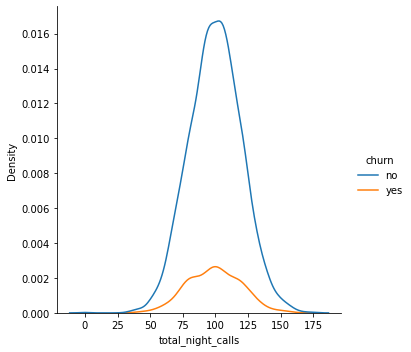

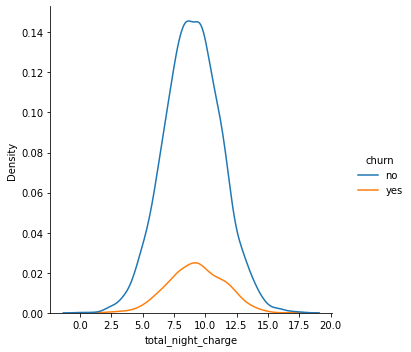

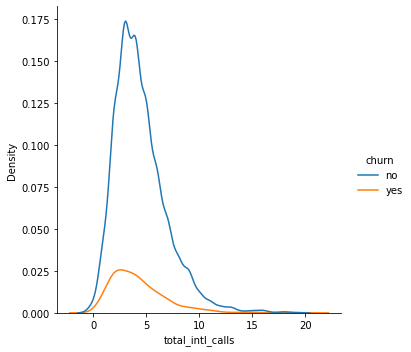

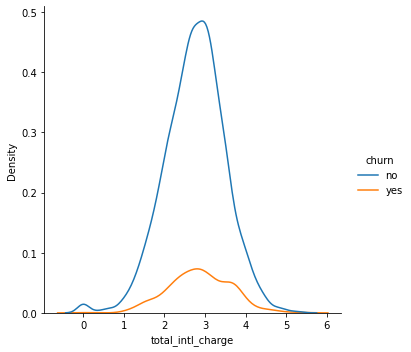

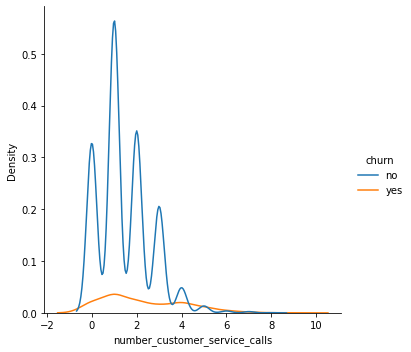

In [23]:
for feature in num_feature:
  sns.displot(train_df , x = feature , hue = 'churn' , kind = 'kde')

whose account_length was between 60 to 130 had the most churn rate.

who had less total_intl_calls, had more churn rate.
who had tota_day_charge more than 48 , had more chance to churn than stay with TELECOM
who didn't use voice mail had more churn rate than others.and who used it more, less chance to churn. 


##Detecting Outlier!!


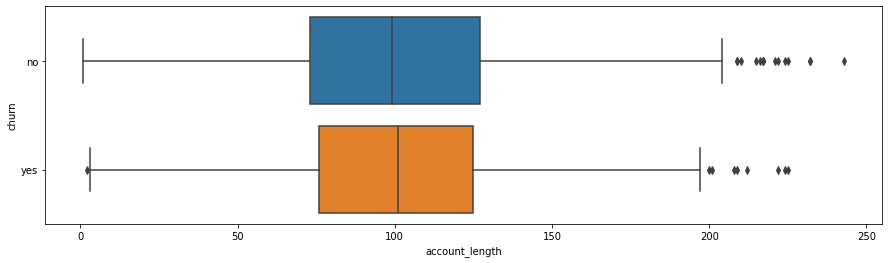

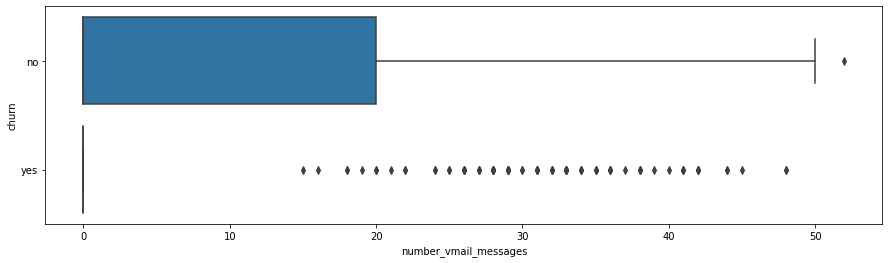

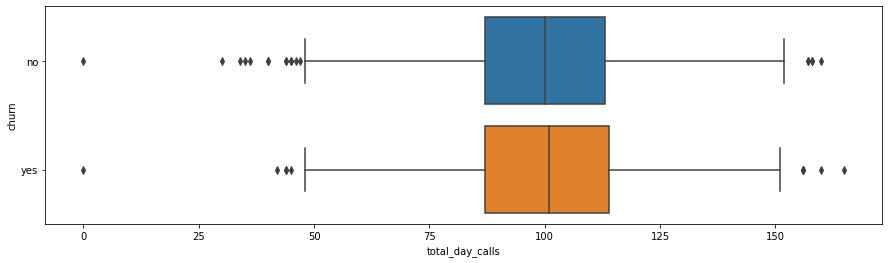

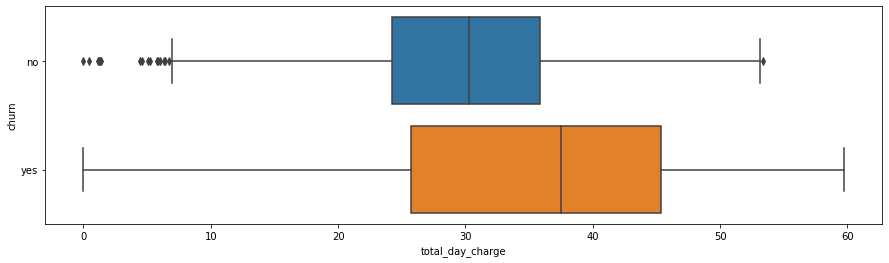

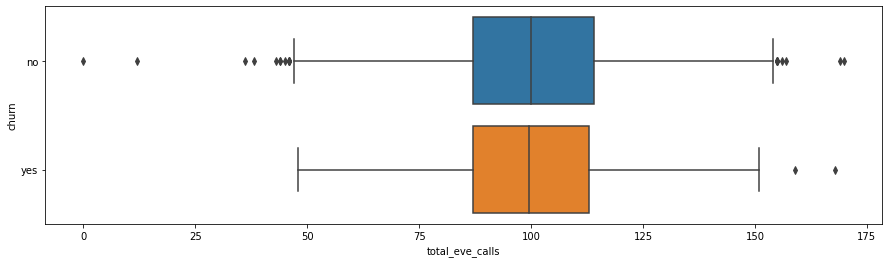

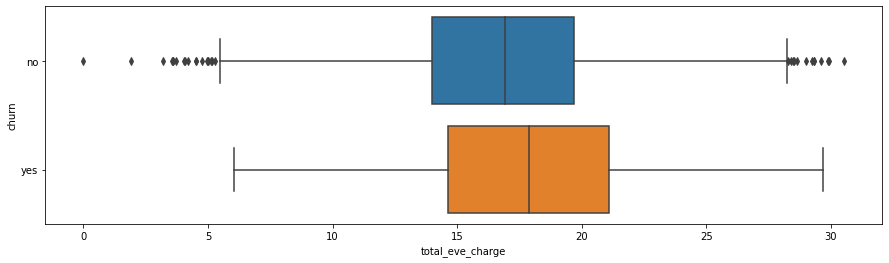

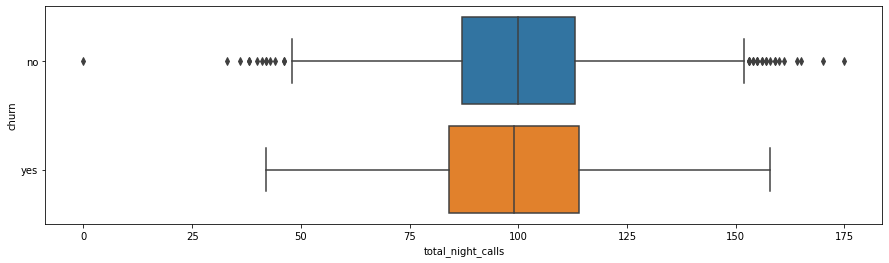

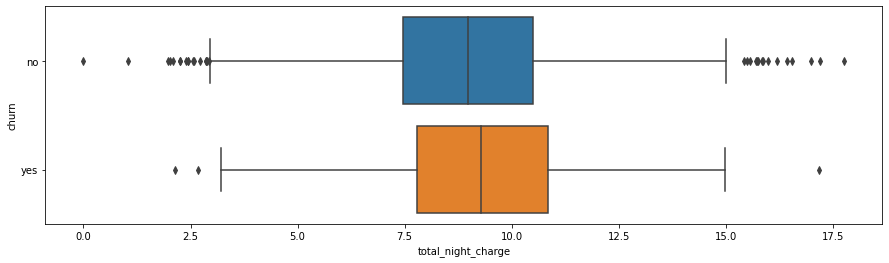

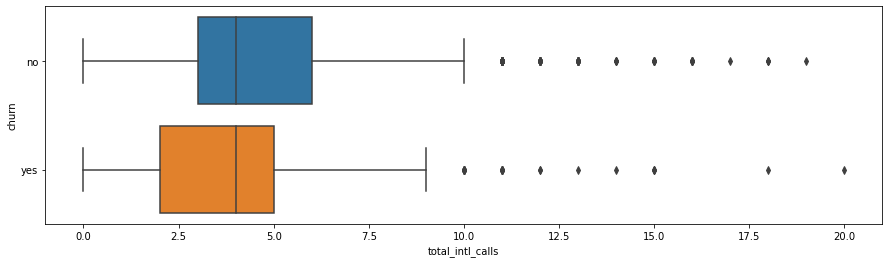

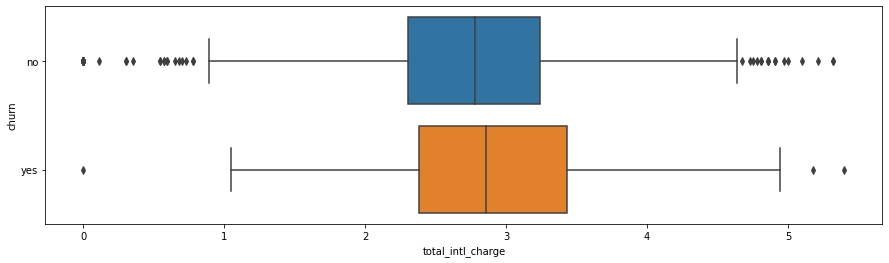

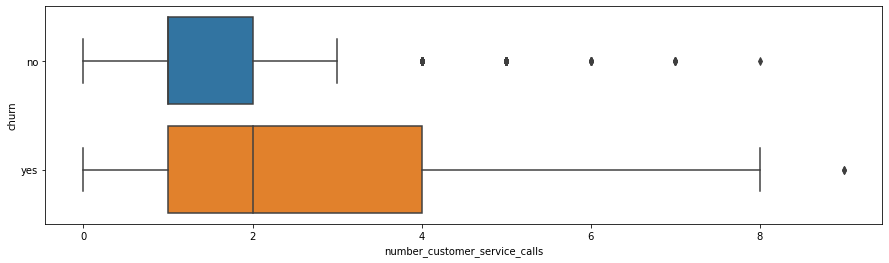

In [24]:
for feature in num_feature:
  plt.figure(figsize=(15,4))
  sns.boxplot(data = train_df , x = feature , y = 'churn')

all of features have outliers and they have useful information too.then I want to replace them by 

###replacing outlier with meadian of it's column

In [25]:
for feature in num_feature:
  q1 = train_df[feature].quantile(0.25)
  q3 = train_df[feature].quantile(0.75)
  IQR = q3 - q1
  low_bound = q1 - (1.5 *IQR)
  up_bound = q3 + (1.5 *IQR)

  train_df.loc[(train_df[feature]< low_bound), feature] = train_df[feature].quantile()
  train_df.loc[(train_df[feature]> up_bound), feature] = train_df[feature].quantile()



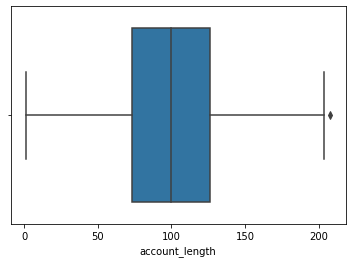

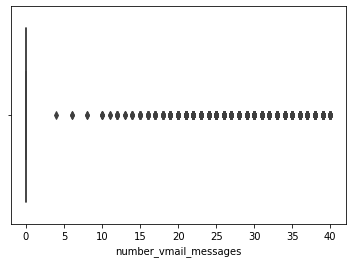

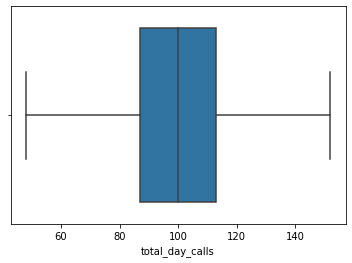

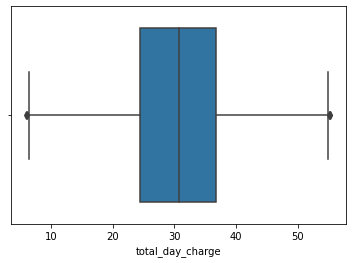

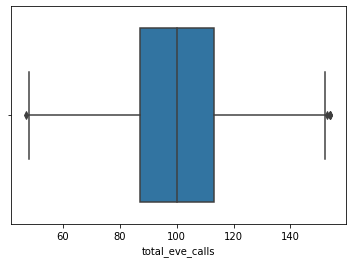

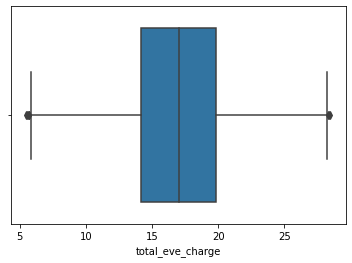

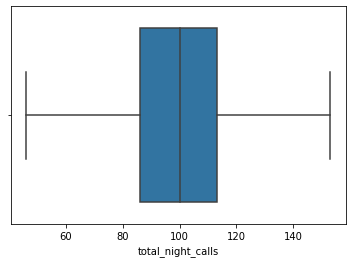

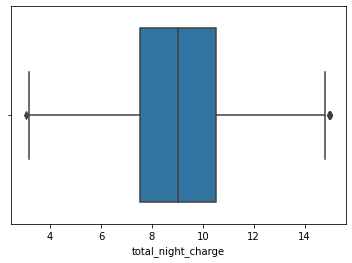

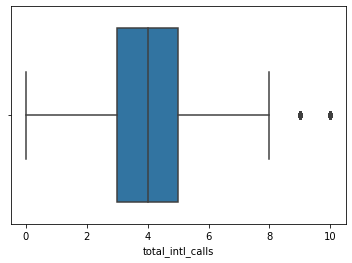

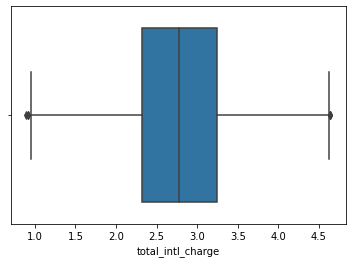

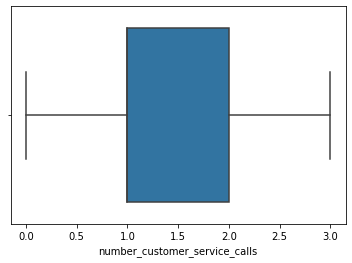

In [26]:
for feature in num_feature:
  sns.boxplot(data = train_df , x = feature)
  plt.show()

in above plot , we can see that there is no more outliers! and we replaced outliers with median.:)Hooray!

##Categorical Variable

In [27]:

cat_feature = [feature for feature in train_df.columns if train_df[feature].dtype == 'O']

cat_feature

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

###becuase of 50 different state one-hot encoder makes lots of Column , then I decide to use BinaryEncoder to produce unic encode for each state in just 6 columns! and also wo will not miss information.

In [28]:
import category_encoders as ce

encoder= ce.BinaryEncoder(cols=['state'],return_df=True)

train_df=encoder.fit_transform(train_df)
train_df




,state_0,state_1,state_2,state_3,state_4,state_5,account_length,area_code,international_plan,voice_mail_plan,...,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,0,1,107,area_code_415,no,yes,...,123,27.47,103,16.62,103,11.45,3,3.70,1,no
1,0,0,0,0,1,0,137,area_code_415,no,no,...,114,41.38,110,10.30,104,7.32,5,3.29,0,no
2,0,0,0,0,0,1,84,area_code_408,yes,no,...,71,50.90,88,17.06,89,8.86,7,1.78,2,no
3,0,0,0,0,1,1,75,area_code_415,yes,no,...,113,28.34,122,12.61,121,8.41,3,2.73,3,no
4,0,0,0,1,0,0,121,area_code_510,no,yes,...,88,37.09,108,17.06,118,9.57,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,1,1,83,area_code_415,no,no,...,70,32.01,88,20.72,79,9.62,6,2.78,0,no
4246,0,0,0,1,1,1,73,area_code_408,no,no,...,89,30.24,82,11.15,89,8.38,6,3.11,3,no
4247,1,0,0,0,1,0,75,area_code_408,no,no,...,101,29.02,126,16.41,104,5.81,7,1.86,1,no
4248,0,1,0,1,0,1,50,area_code_408,no,yes,...,127,40.07,126,18.96,116,13.39,5,2.67,2,no


In [29]:
test_df = encoder.fit_transform(test_df)
test_df

,id,state_0,state_1,state_2,state_3,state_4,state_5,account_length,area_code,international_plan,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,0,0,0,0,0,1,128,area_code_415,no,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,0,0,0,0,1,0,118,area_code_510,yes,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,0,0,0,0,1,1,62,area_code_415,no,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,0,0,0,1,0,0,93,area_code_510,no,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,0,0,0,1,0,1,174,area_code_415,no,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,0,0,1,0,0,0,130,area_code_415,no,...,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,0,1,0,1,1,0,73,area_code_408,no,...,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,1,0,1,1,1,0,152,area_code_415,no,...,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,1,0,1,1,0,0,61,area_code_415,no,...,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [30]:
train_df['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
onehot_area = OneHotEncoder()
onehot_area.fit(train_df[['area_code']])

encoded_values = onehot_area.transform(train_df[['area_code']])
train_df[onehot_area.categories_[0]] = encoded_values.toarray()
train_df = train_df.drop('area_code', axis=1)

# Test
encoded_values = onehot_area.transform(test_df[['area_code']])
test_df[onehot_area.categories_[0]] = encoded_values.toarray()
test_df = test_df.drop('area_code', axis=1)

In [33]:
train_df.head(10)

,state_0,state_1,state_2,state_3,state_4,state_5,account_length,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,0,1,107,no,yes,26,...,16.62,103,11.45,3,3.70,1,no,0.0,1.0,0.0
1,0,0,0,0,1,0,137,no,no,0,...,10.30,104,7.32,5,3.29,0,no,0.0,1.0,0.0
2,0,0,0,0,0,1,84,yes,no,0,...,17.06,89,8.86,7,1.78,2,no,1.0,0.0,0.0
3,0,0,0,0,1,1,75,yes,no,0,...,12.61,121,8.41,3,2.73,3,no,0.0,1.0,0.0
4,0,0,0,1,0,0,121,no,yes,24,...,17.06,118,9.57,7,2.03,3,no,0.0,0.0,1.0
5,0,0,0,1,0,1,147,yes,no,0,...,8.76,96,9.53,6,1.92,0,no,0.0,1.0,0.0
6,0,0,0,1,1,0,117,no,no,0,...,17.06,90,9.71,4,2.35,1,no,1.0,0.0,0.0
7,0,0,0,1,1,1,141,yes,yes,37,...,18.87,97,14.69,5,3.02,0,no,0.0,1.0,0.0
8,0,0,1,0,0,0,65,no,no,0,...,19.42,111,9.40,6,3.43,1,yes,0.0,1.0,0.0
9,0,0,1,0,0,1,74,no,no,0,...,13.89,94,8.82,5,2.46,0,no,0.0,1.0,0.0


###replacing yes and No with 0 , 1! using Where function as speedy function and best option to do this:)

In [43]:
train_df['international_plan'] = pd.Series(np.where(train_df.international_plan.values == 'yes', 1, 0),
          train_df.index )

train_df['voice_mail_plan'] = pd.Series(np.where(train_df.voice_mail_plan.values == 'yes', 1, 0),
          train_df.index )

train_df['churn'] = pd.Series(np.where(train_df.churn.values == 'yes', 1, 0),
          train_df.index )

In [44]:
test_df['international_plan'] = pd.Series(np.where(test_df.international_plan.values == 'yes', 1, 0),
          test_df.index )

test_df['voice_mail_plan'] = pd.Series(np.where(test_df.voice_mail_plan.values == 'yes', 1, 0),
          test_df.index )

In [45]:
train_df

,state_0,state_1,state_2,state_3,state_4,state_5,account_length,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,0,1,107,0,1,26,...,16.62,103,11.45,3,3.70,1,0,0.0,1.0,0.0
1,0,0,0,0,1,0,137,0,0,0,...,10.30,104,7.32,5,3.29,0,0,0.0,1.0,0.0
2,0,0,0,0,0,1,84,0,0,0,...,17.06,89,8.86,7,1.78,2,0,1.0,0.0,0.0
3,0,0,0,0,1,1,75,0,0,0,...,12.61,121,8.41,3,2.73,3,0,0.0,1.0,0.0
4,0,0,0,1,0,0,121,0,1,24,...,17.06,118,9.57,7,2.03,3,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,1,1,83,0,0,0,...,20.72,79,9.62,6,2.78,0,0,0.0,1.0,0.0
4246,0,0,0,1,1,1,73,0,0,0,...,11.15,89,8.38,6,3.11,3,0,1.0,0.0,0.0
4247,1,0,0,0,1,0,75,0,0,0,...,16.41,104,5.81,7,1.86,1,0,1.0,0.0,0.0
4248,0,1,0,1,0,1,50,0,1,40,...,18.96,116,13.39,5,2.67,2,0,1.0,0.0,0.0


In [49]:
from sklearn import preprocessing


min_max_scaler = preprocessing.MinMaxScaler()
train_df = min_max_scaler.fit_transform(train_df)


test_df  = min_max_scaler.fit_transform(test_df)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])